In [20]:
#path for all the Files
path_gre = 'gpa-gre.csv'
path_Russia_df1 = 'Russia2012/Russia2012_1of2.xls'
path_Russia_df2 = 'Russia2012/Russia2012_2of2.xls'

### Question 1:

1) Difference between sparkContext and Sparksession?
-> SparkContext is a primary entry point to spark cluster to construct RDD, accumalators, broadcast variable. Where as Sparksession is entry point built for Dataset and Dataframe which combines SQLContext, HiveContext, and StreamingContext and it also includes sparkContext for computations.

2) What is the difference between a Spark transformation and a Spark action?
-> spark transformations is operation which return/create new dataset/RDD from existing one. Transformations are lazy executed and will calculate only when needed by an action. Example - Filter, Sample
spark actions are not lazily executed and return results to the driver program. basically when we add action spark performs all the neccessary transformation required and produce value. Example - count, reduce

3) Cleaning Data
a) What operations do we have on Panda DataFrames to deal with missing values?
Ans-> there are several useful methods for detecting, removing, and replacing null values in Pandas data structures: - isnull(), notnull(), dropna(), fillna()

b. What are some problems in dealing with missing values in Panda DataFrames?
Ans-> we can only deal with data containing Nan, none format. However in case of data not relevant to column cannot be detected by python missing values. I.e NA, -- in the Name column of user dataframe.

c-> What operations do we have on Spark DataFrames to deal with missing values
Ans We have df_pyspark.na.fill(), df_pyspark.na.drop(), we can also impute missing values with mean using imputer

4) What is a categorical variable? Give an example.
Ans-> categorical variable takes on finite set of values. i.e fixed possible values.
Example: Blood type of a person

5) What are hyperparameters? Give an example
Ans-> Hyperparameters in Machine Learning are the ones whose value is set before starting the learning process. i.e cannot be learned from data.
Example: Maximun Iteration, Column Weight, no of epochs

6) What are two ways to determine a good value for the number of clusters when using K-means?
1. Silhoutte: 
In silhoutte algorithm assumes that data has already been clustered in k clusters. For each cluster 
a(i) = average distance from i-th point to other points within the same cluster
b(i, k) = average distance from the i-th point to the points in the k-th cluster
b(i) = min b(i,k) over all all k except for k = i
s(i) = (b(i) - a(i))/ max(a(i), b(i))
if i is in wrong cluster a(i) will be high, if i-th point is in wrong cluster b(i) will be low
We determine the average silhouette for each value of k and for the value of k which has the maximum value of s(i) is considered the optimal number of clusters.

reference- Notes

2. Elbow Method: 
This method is used to determine the good value for the number of clusters in K-means clustering. Elbow methods plots the value of cost funstion using different values of K. As K will increase the distortion. (It is calculated as the average of the squared distances from the cluster centers of the respective clusters i.e Euclidean distance) will reduce and instance will be close to centriods. However average distortion will decline as the K increases. We need to pick the value of K at which the distortion starts declining. This is the point where we have to stop dividing the data further.

reference: https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml

# Part 2

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

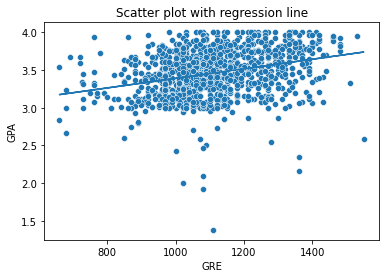

R2 score : 0.08
Adjusted-R2 :  0.07491969605763149


In [73]:
# read and copy to dataframe
data = pd.DataFrame(pd.read_csv(path_gre, sep=","))

#drop na values
data = data.dropna()
data['GRE'] = data['Verbal']+ data['Quant']
data_df = data[['GRE','GPA']]

#Scatter plot with linear regression line
sns.scatterplot(data_df['GRE'], data_df['GPA']) 
a, b = np.polyfit(data_df['GRE'], data_df['GPA'], 1)       
x = data_df['GRE']        
plt.plot(x, a*x + b)
plt.title('Scatter plot with regression line')
plt.show()
x= data_df[['GRE']]
y= data_df[['GPA']]

#Split Model for test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,  random_state =100 )
model = LinearRegression().fit(x_train, y_train)
result = model.predict(x_test)

#r2_Score calculation
r2= r2_score(y_test, result)
print("R2 score : %.2f" % r2)

#compute adjusted r2_score
N=y_test.shape[0]
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

No, Gre score are not good indicator of students grade in graduate school. As we see r2= 0.08 and adjusted-r2 is 0.07 which has reduced. r2-adjusted reduces if we add useless variable to model.

# 2 Question

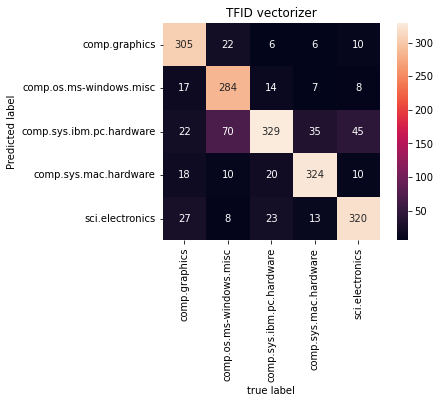

In [70]:
# define category 
category = [
    'comp.os.ms-windows.misc', 'sci.electronics', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.graphics'
]

#copy test and train data 
newsgroups_train = fetch_20newsgroups(subset="train", categories=category, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset="test", categories=category, shuffle=True, random_state=42)

#Create Pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(newsgroups_train.data, newsgroups_train.target)
labels = model.predict(newsgroups_test.data)

#compute error matrix for predicted and actual data and produce heatmap
error_matrix = confusion_matrix(newsgroups_test.target, labels)
sns.heatmap(error_matrix.T, square=True, annot=True, fmt='d', cbar=True,
xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_test.target_names)
plt.xlabel('true label')
plt.ylabel('Predicted label')
plt.title('TFID vectorizer')
plt.show()

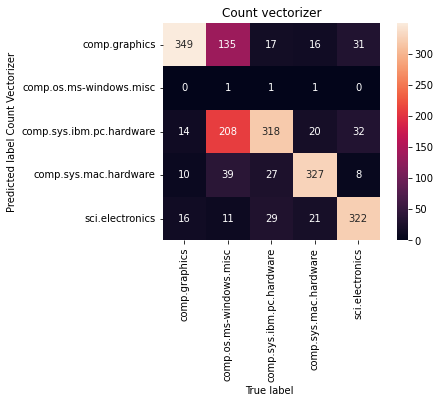

In [72]:
# Create Pipeline 
model_cv =  make_pipeline(CountVectorizer(), MultinomialNB())
model_cv.fit(newsgroups_train.data, newsgroups_train.target)
labels_cv = model_cv.predict(newsgroups_test.data)

#generate Error matrix and produce heatmap
error_matrix_cv = confusion_matrix(newsgroups_test.target, labels_cv)
ax = sns.heatmap(error_matrix_cv.T, square=True, annot=True, fmt='d', cbar=True,
xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_test.target_names)
plt.xlabel('True label ')
plt.ylabel('Predicted label Count Vectorizer');
plt.title('Count vectorizer')
plt.show()

TTfidfVectorizer is effective than CountVectorizer. As we can see prediction using Countvectorizer has more false positive and False negative compared to TTfidvectorizer

# 3 Question

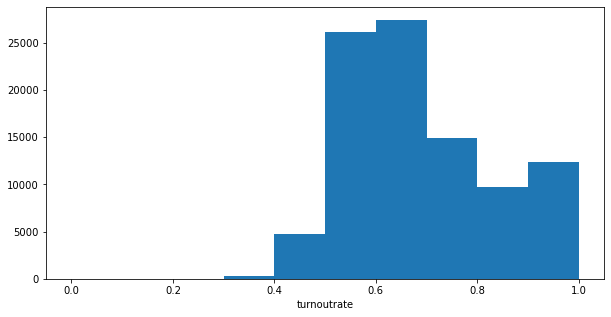

In [59]:
#read both files and copy dataframe
df1 = pd.DataFrame(pd.read_excel(path_Russia_df1))
df2 = pd.DataFrame(pd.read_excel(path_Russia_df2))
# Combine dataframe
complete_df = pd.concat([df1,df2]).fillna(0).replace('A', 0)
complete_df = complete_df.rename(columns = {'Unnamed: 0': 'District', 'Unnamed: 1':'District pol no', 'Unnamed: 22':'Zhirinovsky Vladimir Zhirinovsky%','Unnamed: 24':'Gennady Andreyevich Zyuganov%','Unnamed: 26':'Sergei M. Mironov%','Unnamed: 28':'Mikhail Prokhorov%', 'Unnamed: 30':'Vladimir Putin%'})

#choose only required column for computation
russia_df = complete_df[['District pol no','The number of voters included in voters list','Zhirinovsky Vladimir Zhirinovsky','Gennady Andreyevich Zyuganov','Sergei M. Mironov','Mikhail Prokhorov','Vladimir Putin']]

#calculate number of votes by all the candidates
russia_df['Total Votes'] = russia_df['Zhirinovsky Vladimir Zhirinovsky'] + russia_df['Gennady Andreyevich Zyuganov'] + russia_df['Sergei M. Mironov'] + russia_df['Mikhail Prokhorov'] + russia_df['Vladimir Putin']

#calculate turout rate 
russia_df['turnoutrate'] =russia_df['Total Votes']/ russia_df['The number of voters included in voters list']

#plot histogram
fig, axis = plt.subplots(figsize =(10, 5))
axis.hist(russia_df['turnoutrate'])
plt.xlabel('turnoutrate')
plt.show()

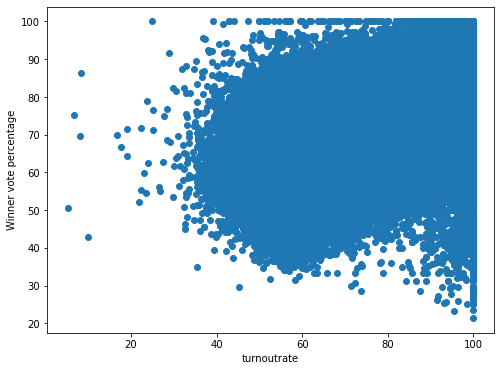

In [81]:
#find winner per district and calculate percentage 
russia_df['max_vote'] = russia_df[['Zhirinovsky Vladimir Zhirinovsky','Gennady Andreyevich Zyuganov','Sergei M. Mironov', 'Mikhail Prokhorov', 'Vladimir Putin']].max(axis=1)
russia_df['percent vote'] = russia_df['max_vote']/russia_df['Total Votes']

#produce Scatter plot for turnoutrate and percent vote for winner
fig, axis = plt.subplots(figsize =(8, 6))
axis.scatter(russia_df['turnoutrate']*100, russia_df['percent vote']*100)
plt.xlabel('turnoutrate')
plt.ylabel('Winner vote percentage')
plt.show()

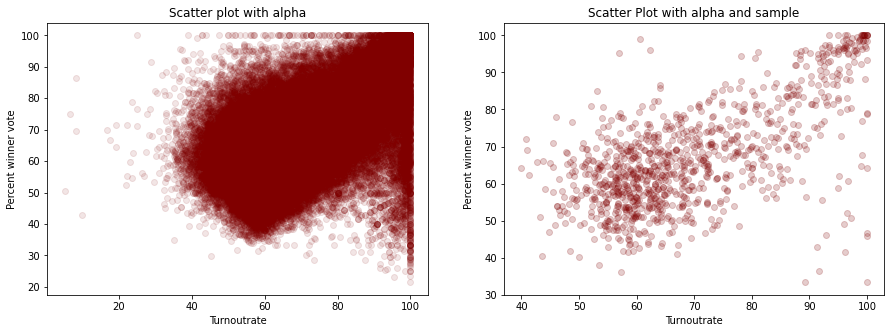

In [82]:
# Scatter plot with Alpha for better intrepretation
fig, axis = plt.subplots(nrows=1, ncols=2, figsize =(15, 5))
axis[0].scatter(russia_df['turnoutrate']*100, russia_df['percent vote']*100, c = 'maroon', alpha=0.1)
axis[0].set(xlabel ="Turnoutrate", ylabel= "Percent winner vote")
axis[0].set_title("Scatter plot with alpha")

# Scatter plot with random sampling
df_random = russia_df[['turnoutrate', 'percent vote']].sample(1000)
axis[1].scatter(df_random['turnoutrate']*100, df_random['percent vote']*100, c = 'maroon', alpha=0.2)
axis[1].set(xlabel ="Turnoutrate", ylabel= "Percent winner vote")
axis[1].set_title("Scatter Plot with alpha and sample")
plt.show()